<a href="https://colab.research.google.com/github/ShubhamDhakarey/assignment/blob/main/PBL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection PBL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools
import calendar
from scipy.stats import norm, skew, skewtest
import random
from sklearn.preprocessing import StandardScaler
import datetime as dt
 


In [ ]:
complete_df = pd.read_csv("fraudTrain.csv") 
complete_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
complete_df.shape

(1296675, 23)

In [ ]:
complete_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Preprocessing for Analysis

Checking for duplicate or missing values

In [ ]:
#Two ways to drop duplicates 
duplicate = pd.DataFrame.duplicated(complete_df)
complete_df.drop_duplicates(inplace=True)

In [ ]:
duplicate.sum()

In [ ]:
complete_df.isnull().sum()

# Handling Null Values

    #Transforming features into a more appropriate format

In [ ]:
df_grouped = complete_df.groupby(["cc_num", "first", "last"]).ngroup()
complete_df = pd.concat([complete_df, df_grouped], axis=1)
complete_df.rename(columns={0:"identifier"}, inplace=True)

In [ ]:
df_grouped

0          444
1           42
2          237
3          509
4          368
          ... 
1296670    179
1296671    813
1296672    474
1296673    451
1296674    917
Length: 1296675, dtype: int64

In [ ]:
#Calculate Age for Specific Person
def returnAge(dob):
    dob = dt.datetime.strptime(dob, "%Y-%m-%d").date()
    today = dt.date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))   
complete_df["age"] = complete_df["dob"].apply(returnAge)
complete_df.drop("dob", axis=1, inplace=True)
print(complete_df["age"])

0          35
1          44
2          61
3          56
4          37
           ..
1296670    61
1296671    43
1296672    55
1296673    42
1296674    27
Name: age, Length: 1296675, dtype: int64


In [ ]:
#Calculate Hour,Day,Month,Year from a single column trans_date_trans_time
def returnTime(date_time, which):
    date_time = dt.datetime.strptime(date_time[:13], "%Y-%m-%d %H")
    if which == 0: return date_time.year
    elif which == 1: return date_time.month
    elif which == 2: return date_time.day
    elif which == 3: return date_time.hour
complete_df["year"] = complete_df["trans_date_trans_time"].apply(returnTime, which=0) 
complete_df["month"] = complete_df["trans_date_trans_time"].apply(returnTime, which=1) 
complete_df["day"] = complete_df["trans_date_trans_time"].apply(returnTime, which=2) 
complete_df["hour"] = complete_df["trans_date_trans_time"].apply(returnTime, which=3)
complete_df.drop(["trans_date_trans_time"], axis=1, inplace=True)
print(complete_df["year"])

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: year, Length: 1296675, dtype: int64


In [ ]:
complete_df["hour"]

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: hour, Length: 1296675, dtype: int64

In [ ]:
#Calculate Latitude and Longitude
complete_df["long_dist"] = abs(complete_df["long"]-complete_df["merch_long"])
complete_df["lat_dist"] = abs(complete_df["lat"]-complete_df["merch_lat"])
complete_df.drop(["lat", "long", "merch_lat", "merch_long"], axis=1, inplace=True)

# Data Analysis

Testing for correlation

In [ ]:
p = complete_df.corr("pearson")["is_fraud"]
s = complete_df.corr("spearman")["is_fraud"] #in text, describe differences seen
df = pd.concat([s, p], axis=1)
df.columns = ["Spearman", "Pearson"]
df.sort_values(by="Spearman", ascending=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2740\532117298.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = complete_df.corr("pearson")["is_fraud"]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2740\532117298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = complete_df.corr("spearman")["is_fraud"] #in text, describe differences seen


,Spearman,Pearson
is_fraud,1.000000,1.000000
amt,0.087924,0.219404
hour,0.022387,0.013799
age,0.011357,0.012445
day,0.003872,0.003848
year,0.003004,0.003004
city_pop,0.001325,0.002136
lat_dist,0.000654,0.000655
cc_num,0.000412,-0.000981
identifier,0.000412,0.000392


Testing for skewness

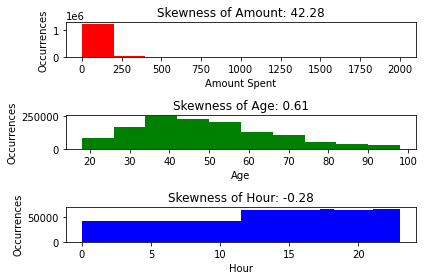

In [ ]:
amt = str(round(complete_df["amt"].skew(axis = 0, skipna = True),2))
age = str(round(complete_df["age"].skew(axis = 0, skipna = True),2))
hour = str(round(complete_df["hour"].skew(axis = 0, skipna = True),2))

fig, ax = plt.subplots(3)
ax[0].hist(complete_df["amt"], 10, range=(0, 2000), histtype="stepfilled", align="mid", color="r")
ax[1].hist(complete_df["age"], 10, histtype="stepfilled", align="mid", color="g")
ax[2].hist(complete_df["hour"], 24, range=(0, 23), histtype="stepfilled", align="mid", color="b")

ax[0].set_title("Skewness of Amount: "+amt)
ax[0].set_xlabel('Amount Spent')
ax[0].set_ylabel('Occurrences')
ax[1].set_title("Skewness of Age: "+age)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Occurrences')
ax[2].set_title("Skewness of Hour: "+hour)
ax[2].set_xlabel('Hour')
ax[2].set_ylabel('Occurrences')
fig.tight_layout()             
plt.show()


In [ ]:
fraud = complete_df[complete_df["is_fraud"]==1]
non_fraud = complete_df[complete_df["is_fraud"]==0]

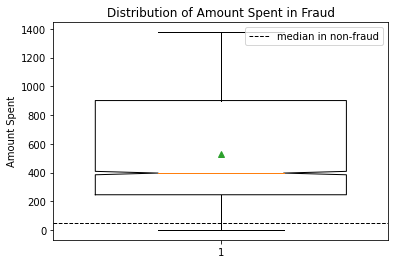

In [ ]:
avg = non_fraud["amt"].median()
fraud_amt = fraud["amt"]
plt.boxplot(fraud_amt, sym="gx", widths=.75, notch=True, showmeans=True)
plt.axhline(avg, color='k', linestyle='dashed', linewidth=1, label="median in non-fraud")
plt.title("Distribution of Amount Spent in Fraud")
plt.ylabel("Amount Spent")
plt.legend(loc=1)
plt.show()

Checking for a connection between job and fraudulent transactions

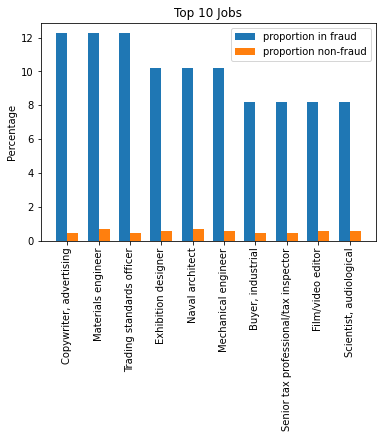

In [ ]:
fraud_unique = fraud.groupby("identifier").sample()
non_fraud_unique = non_fraud.groupby("identifier").sample()

fraud_job = fraud_unique[["job"]]
counts = fraud_job.value_counts()[:10].apply(lambda x: x/fraud_job.value_counts()[:10].sum())*100
total_counts = [non_fraud_unique[non_fraud_unique["job"]==i[0]]["job"].value_counts()[0]/len(non_fraud_unique)*100 for i in counts.index] 

labels = [i[0] for i in counts.index]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='proportion in fraud')
rects2 = ax.bar(x + width/2, total_counts, width, label='proportion non-fraud')

ax.set_ylabel('Percentage')
ax.set_title('Top 10 Jobs')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()

Checking for a connection between category and fraudulent transactions

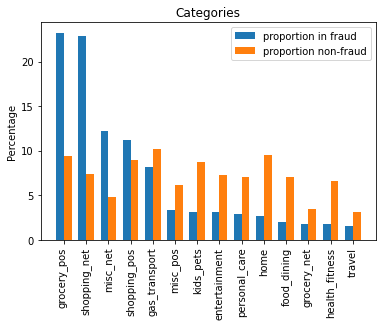

In [ ]:
fraud_cat = fraud["category"]
counts = fraud_cat.value_counts().apply(lambda x: x/fraud_cat.value_counts().sum())*100
total_counts = [non_fraud[non_fraud["category"]==i]["category"].value_counts()[0]/len(non_fraud)*100 for i in counts.index] #get occurences from complete df to compare

labels = counts.index

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='proportion in fraud')
rects2 = ax.bar(x + width/2, total_counts, width, label='proportion non-fraud')

ax.set_ylabel('Percentage')
ax.set_title('Categories')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()

Checking for a connection between difference in time and fraudulent transactions

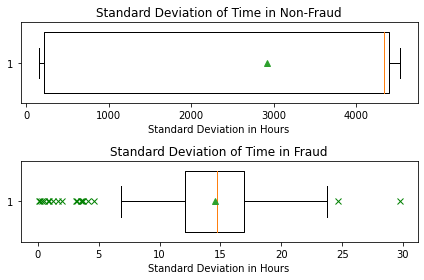

In [ ]:
f = fraud.groupby(["cc_num", "month"])["unix_time"].std() 
nf = non_fraud.groupby(["cc_num", "month"])["unix_time"].std()
df = pd.concat([f, nf], axis=1, join="inner").dropna().apply(lambda x: x/(60**2))
df.columns = ["fraud", "non_fraud"]

fig, ax = plt.subplots(2)
ax[0].boxplot(df["non_fraud"], widths=.75, notch=False, showmeans=True, vert=False)
ax[1].boxplot(df["fraud"], sym="gx", widths=.75, notch=False, showmeans=True, vert=False)

ax[0].set_title("Standard Deviation of Time in Non-Fraud")
ax[0].set_xlabel("Standard Deviation in Hours")
ax[1].set_title("Standard Deviation of Time in Fraud")
ax[1].set_xlabel("Standard Deviation in Hours")
fig.tight_layout()             
plt.show()

plt.show()

Checking for a connection between age and fraudulent transactions

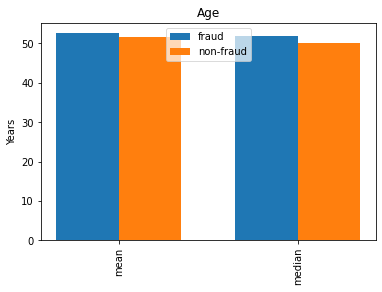

In [ ]:
fraud_age = fraud.groupby("identifier").sample()["age"]
age = non_fraud.groupby("identifier").sample()["age"]


v_1 = [fraud_age.mean(), fraud_age.median()]
v_2 = [age.mean(), age.median()]
y = ["mean", "median"]

x = np.arange(len(y))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, v_1, width, label='fraud')
rects2 = ax.bar(x + width/2, v_2, width, label='non-fraud')

ax.set_ylabel('Years')
ax.set_title('Age')
ax.set_xticks(x)
ax.set_xticklabels(y, rotation=90)
ax.legend(loc=9, framealpha=0.7)

plt.show()

# Preprocessing For Training

Removing persoanl, irrelevant, and redundant information

In [ ]:
train_df = complete_df
train_df.drop(["Unnamed: 0", "gender", "first", "last", "street", "city", "state", "zip", "trans_num", "year", "day", "month"], axis=1, inplace=True) 

Checking for imbalanced dataset

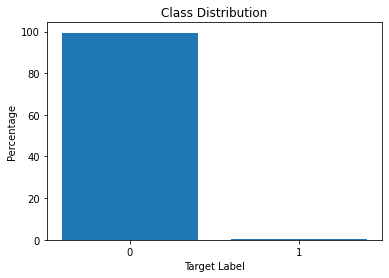

In [ ]:
p_fraud = len(train_df[train_df["is_fraud"]==1])/len(train_df)*100
p_non_fraud = len(train_df[train_df["is_fraud"]==0])/len(train_df)*100
ax = plt.axes()
ax.set_ylabel('Percentage')
ax.set_xlabel('Target Label')
ax.set_title('Class Distribution')
plt.bar(["0", "1"], [p_non_fraud, p_fraud])
plt.show()

# Outlier Detection

In [ ]:
def index_of_outliers(x): #get index of outliers for specified categories
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))
age = index_of_outliers(train_df["age"])[0] 
amt = index_of_outliers(train_df["amt"])[0] 
long = index_of_outliers(train_df["long_dist"])[0] 
lat = index_of_outliers(train_df["lat_dist"])[0] 

In [ ]:
indices = np.concatenate((age, [i for i in amt if i not in age])) #concatenate them
train_df.loc[indices, 'outlier'] = 1 #create new column
train_df['outlier'] = train_df['outlier'].fillna(0)
print(indices)

[   5953   14633   16029 ... 1296590 1296603 1296657]


# Encoding Categorical Variables

In [ ]:
#Calculate unique value for specific column
lm = len(train_df["merchant"].unique())
lc = len(train_df["category"].unique())
lj = len(train_df["job"].unique())
print("merchant: "+str(lm)+"\ncategory: "+str(lc)+"\njob: "+str(lj))

merchant: 693
category: 14
job: 494


In [ ]:
#Normalize these attributes 
freq_m = train_df["merchant"].value_counts(normalize=True)*1000 #low value
freq_c = train_df["category"].value_counts(normalize=True)*10
freq_j = train_df["job"].value_counts(normalize=True)*1000

In [ ]:
freq_m

fraud_Kilback LLC                       3.395608
fraud_Cormier LLC                       2.814121
fraud_Schumm PLC                        2.802553
fraud_Kuhn LLC                          2.706923
fraud_Boyer PLC                         2.693813
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.597683
fraud_Treutel-King                      0.597683
fraud_Medhurst, Labadie and Gottlieb    0.585343
fraud_Reichert-Weissnat                 0.580716
fraud_Hahn, Douglas and Schowalter      0.560665
Name: merchant, Length: 693, dtype: float64

In [ ]:
freq_c

gas_transport     1.015359
grocery_pos       0.953500
home              0.949467
shopping_pos      0.899778
kids_pets         0.871730
shopping_net      0.752255
entertainment     0.725039
food_dining       0.705350
personal_care     0.699929
health_fitness    0.662302
misc_pos          0.614302
misc_net          0.488071
grocery_net       0.350527
travel            0.312391
Name: category, dtype: float64

In [ ]:
freq_j

Film/video editor             7.541597
Exhibition designer           7.094299
Naval architect               6.697129
Surveyor, land/geomatics      6.694044
Materials engineer            6.377851
                                ...   
Information officer           0.006170
Veterinary surgeon            0.006170
Ship broker                   0.005398
Contracting civil engineer    0.005398
Warehouse manager             0.005398
Name: job, Length: 494, dtype: float64

In [ ]:
train_df["merchant"] = train_df["merchant"].map(freq_m)
train_df["category"] = train_df["category"].map(freq_c)
train_df["job"] = train_df["job"].map(freq_j)

In [ ]:
print(train_df["merchant"])
print()
print(train_df["category"])
print()
print(train_df["job"])

0          0.977115
1          1.930322
2          1.461430
3          2.015154
4          1.227756
             ...   
1296670    1.470685
1296671    1.350377
1296672    1.429040
1296673    1.472998
1296674    1.378911
Name: merchant, Length: 1296675, dtype: float64

0          0.488071
1          0.953500
2          0.725039
3          1.015359
4          0.614302
             ...   
1296670    0.725039
1296671    0.705350
1296672    0.705350
1296673    0.705350
1296674    0.705350
Name: category, Length: 1296675, dtype: float64

0          2.733916
1          3.932365
2          0.394085
3          1.951144
4          1.555517
             ...   
1296670    4.334162
1296671    0.409509
1296672    6.697129
1296673    1.560915
1296674    1.949602
Name: job, Length: 1296675, dtype: float64


In [ ]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv') 
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
print("fraudTrain.csv Shape : " , train.shape)
print("fraudTest.csv Shape : " , test.shape)

fraudTrain.csv Shape :  (1296675, 23)
fraudTest.csv Shape :  (555719, 23)


# Data Cleaning

In [ ]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Converting dob, trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column -

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [ ]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [ ]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


# Categorical Variable Analysis

In [ ]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [ ]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [ ]:
totalcat=total.select_dtypes(include=['object'])

In [ ]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


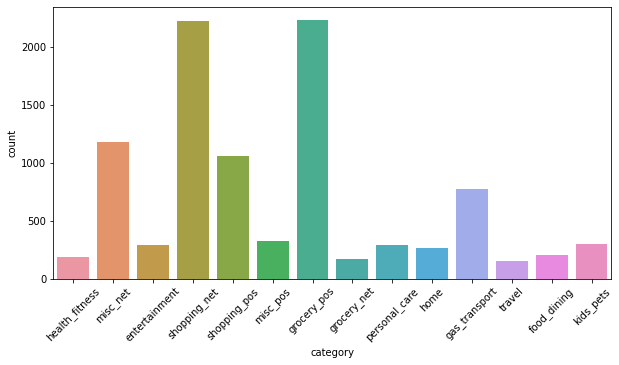

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

# Most frauds occured in categories of shopping_net and grocery_pos

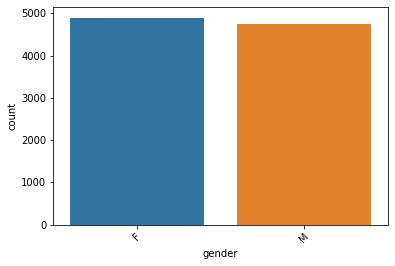

In [ ]:
#Determine gender, more cases of fraud happened 
sns.countplot(x=total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

Although more cases of fraud happened with female customers, the number is almost the same for both Males and Females

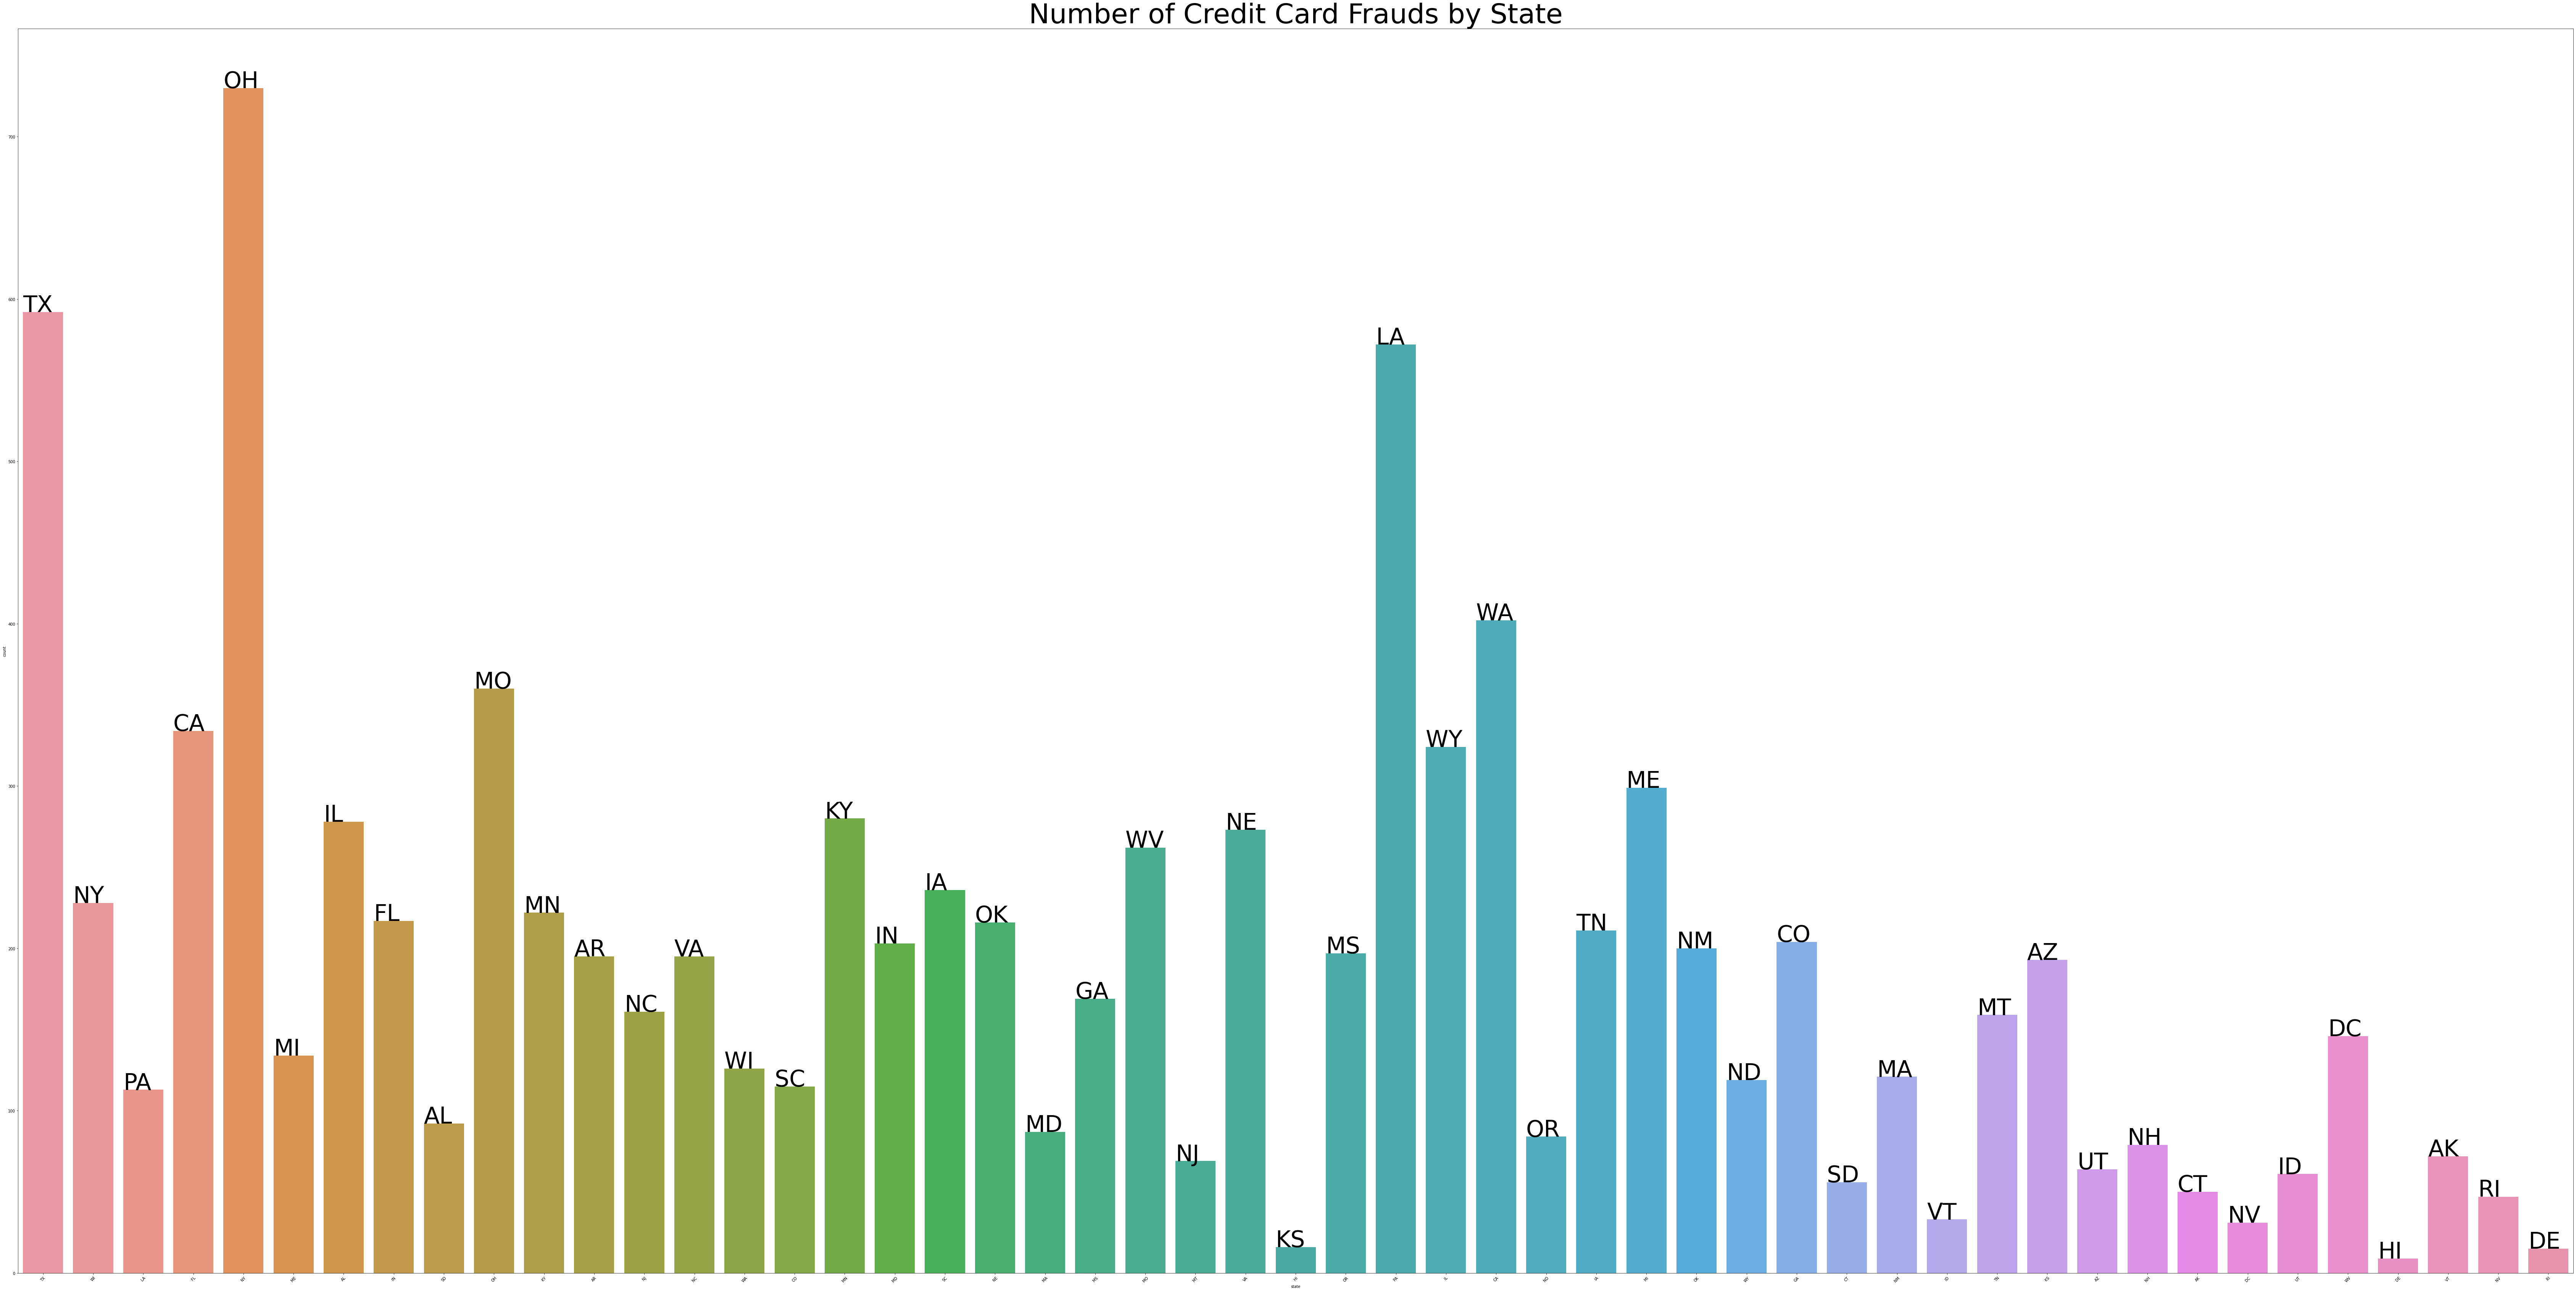

In [ ]:
#Determine fraud cases states wise
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(x=total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

# Number of Credit Card Frauds by City

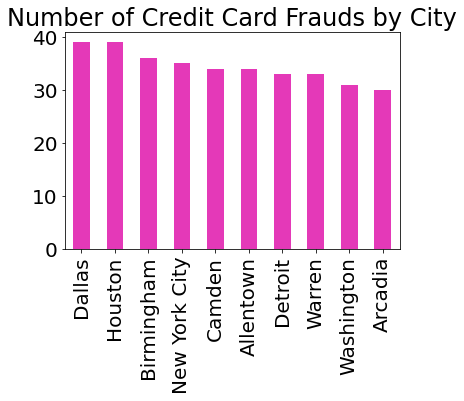

In [ ]:
#Determine fraud cases by city 
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

# Number of Credit Card Frauds by Job

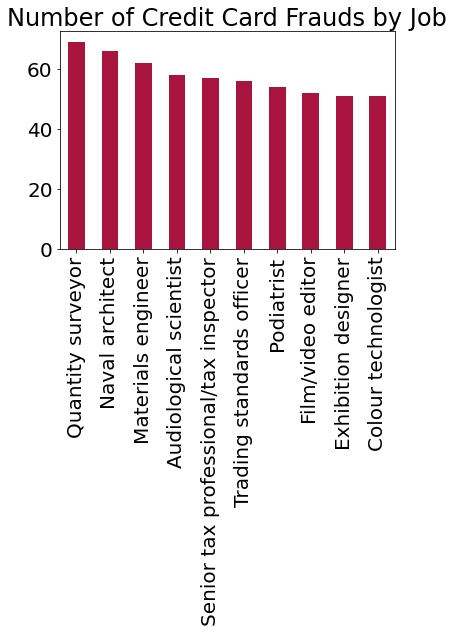

In [ ]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

# Numerical Variable Analysis

checking the spread & skewness of all numerical variables

In [ ]:
del total['is_fraud_cat']

In [ ]:
#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [ ]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [ ]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(5)
memory usage: 155.5 MB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2740\3831546736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['amt'],fit = norm,color = randomcolor())


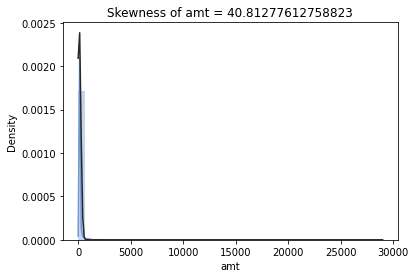

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2740\1458263499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['city_pop'],fit = norm,color = randomcolor())


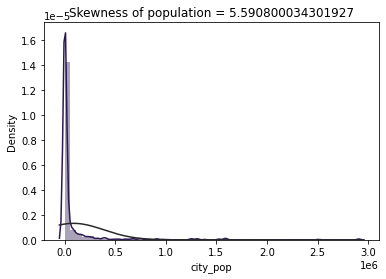

In [ ]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2740\3201600023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())


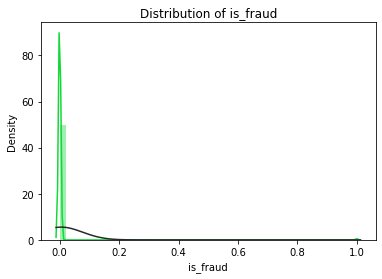

In [ ]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()

In [ ]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(5)
memory usage: 226.1+ MB


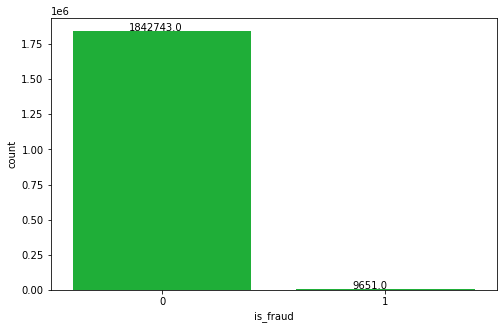

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"]

0          52.0
1          30.0
2          49.0
3          32.0
4          64.0
           ... 
1296670    58.0
1296671    40.0
1296672    52.0
1296673    39.0
1296674    24.0
Name: age, Length: 1852394, dtype: float64

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
dtypes: datetime64[ns](3), float64(6), int64(2), object(5)
memory usage: 240.3+ MB


# Number of Credit Card Frauds by Age Groups

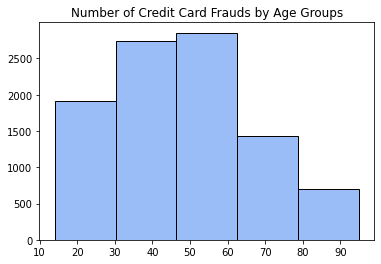

In [ ]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

creating transacation month and transaction year columns

In [ ]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [ ]:
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

# Number of Credit Card Frauds by month

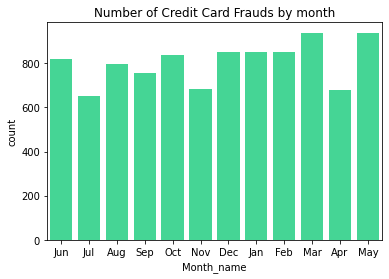

In [ ]:
sns.countplot(x=total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

# Number of Credit Card Frauds by Gender

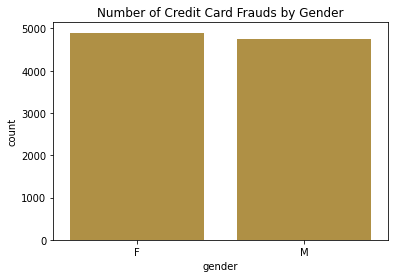

In [ ]:
sns.countplot(x=total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

# Number of Credit Card Frauds by year

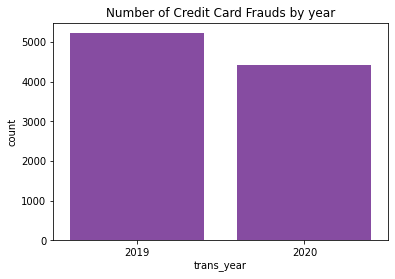

In [ ]:
sns.countplot(x=total[total["is_fraud"]==1]["trans_year"],color=randomcolor())
plt.title("Number of Credit Card Frauds by year")
plt.show()


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
 16  trans_month            int64         
 17  trans_year             int64         
dtypes: datetime64[ns](3), 

In [ ]:
total.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [ ]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

0    1014749
1     837645
Name: gender, dtype: int64